In [1]:
from PIL import Image
from IPython.display import display

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = 'PuckerImages//RGB_cropped'
file_list = [f for f in os.listdir(path) if os.path.isfile(f'{path}//{f}')]

Opened file: Pucker1.png


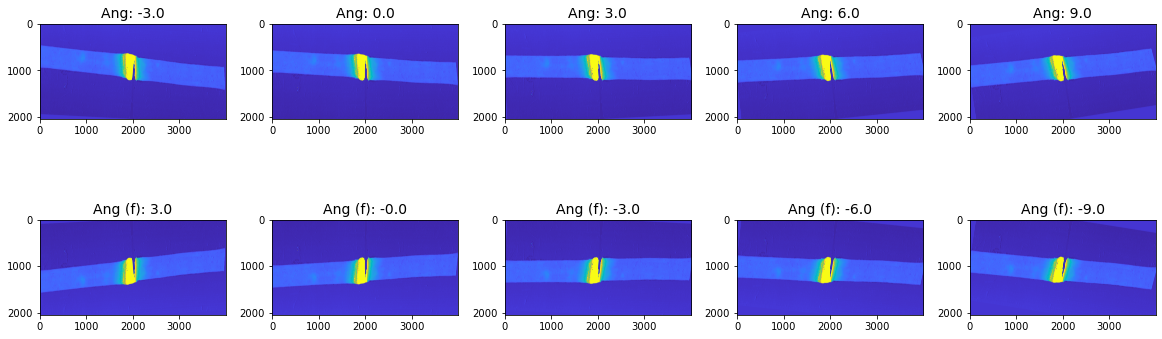

In [21]:
if 0:
    angle_list = [-2.5, 0, 2.5, 5, 7.5]
else:
    angle_min = -3
    angle_max = 9
    angle_step = 3

    angle_list = np.arange(angle_min, 1.1*angle_max, angle_step)


file = file_list[0]
print(f'Opened file: {file}')
img = Image.open(f'{path}//{file}')
#transpose the original image
img_flip = img.transpose(Image.FLIP_TOP_BOTTOM)
#convert to array
image_data_original = np.array(img)


fig, axes = plt.subplots(2,len(angle_list), figsize=(20,6))
fig.subplots_adjust(hspace=0.5, wspace=0.25)
linewidth = 3.0
fontsize_sec = 14


for i, angle in enumerate(angle_list):
    #rotate the image
    img_rotated = img.rotate(angle)
    angle_flip = angle*(-1)
    img_flip_rotated = img_flip.rotate(angle_flip)
    #convert to array
    image_rotated_data = np.array(img_rotated)
    image_flip_rotated_data = np.array(img_flip_rotated)
    #cutoff the end
    image_rotated_data = image_rotated_data[:,:-96,:]
    image_flip_rotated_data = image_flip_rotated_data[:,:-96,:]
    
    if 1:
        #fill black regions with background colour  
        #color used for replacement from top left corner
        r2,g2,b2 = image_data_original[0,0]    
        #create mask where pixels are black
        r1, g1, b1 = image_rotated_data[:,:,0], image_rotated_data[:,:,1], image_rotated_data[:,:,2]
        mask = (r1 == 0) & (g1 == 0) & (b1 == 0)
        #replace black pixels
        image_rotated_data[:,:,:3][mask] = [r2, g2, b2]
        
        #repeat for flipped image
        #create mask where pixels are black
        r1, g1, b1 = image_flip_rotated_data[:,:,0], image_flip_rotated_data[:,:,1], image_flip_rotated_data[:,:,2]
        mask = (r1 == 0) & (g1 == 0) & (b1 == 0)
        #replace black pixels
        image_flip_rotated_data[:,:,:3][mask] = [r2, g2, b2]
    
    ax = axes[0, i]
    ax.imshow(image_rotated_data)
    ax.set_title(f'Ang: {angle}', fontsize=fontsize_sec)
    
    ax = axes[1, i]
    ax.imshow(image_flip_rotated_data)
    ax.set_title(f'Ang (f): {angle_flip}', fontsize=fontsize_sec)

Opened file: Pucker24.png


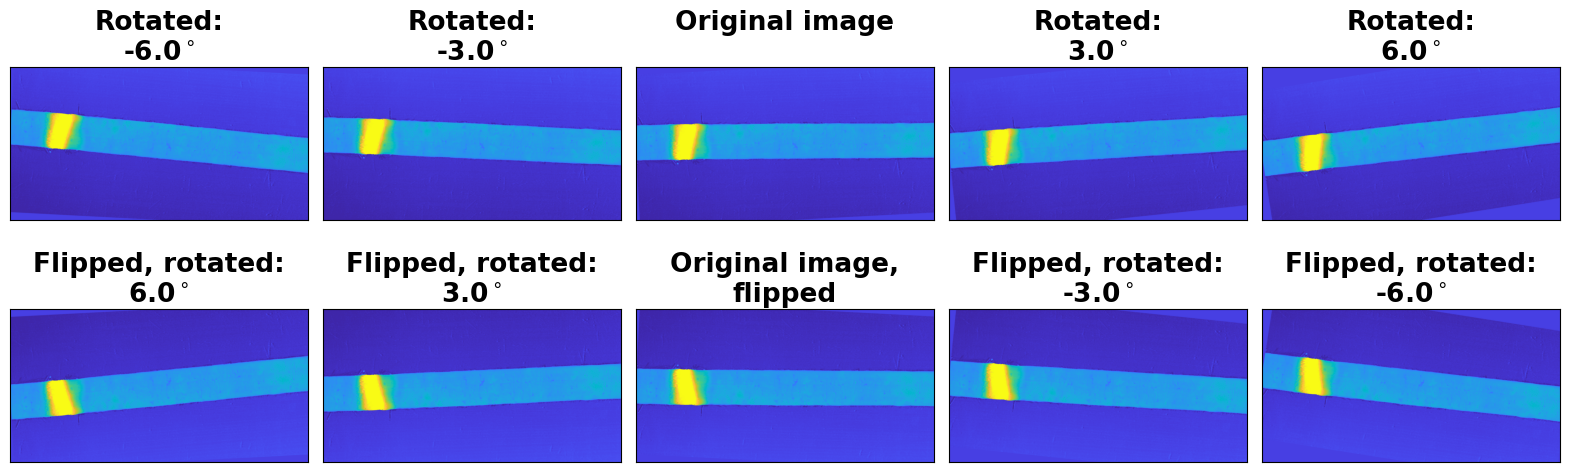

In [20]:
#for paper publication
if 0:
    angle_list = [-2.5, 0, 2.5, 5, 7.5]
else:
    angle_min = -3
    angle_max = 9
    angle_step = 3

    angle_list = np.arange(angle_min, 1.1*angle_max, angle_step)


file = file_list[0]
print(f'Opened file: {file}')
img = Image.open(f'{path}//{file}')
#transpose the original image
img_flip = img.transpose(Image.FLIP_TOP_BOTTOM)
#convert to array
image_data_original = np.array(img)


fig, axes = plt.subplots(2,len(angle_list), figsize=(20,6))
fig.subplots_adjust(hspace=0.1, wspace=0.05)
linewidth = 3.0
fontsize_sec = 14


for i, angle in enumerate(angle_list):
    #rotate the image
    img_rotated = img.rotate(angle)
    angle_flip = angle*(-1)
    img_flip_rotated = img_flip.rotate(angle_flip)
    #convert to array
    image_rotated_data = np.array(img_rotated)
    image_flip_rotated_data = np.array(img_flip_rotated)
    #cutoff the end
    image_rotated_data = image_rotated_data[:,:-96,:]
    image_flip_rotated_data = image_flip_rotated_data[:,:-96,:]
    
    if 1:
        #fill black regions with background colour  
        #color used for replacement from top left corner
        r2,g2,b2 = image_data_original[0,0]    
        #create mask where pixels are black
        r1, g1, b1 = image_rotated_data[:,:,0], image_rotated_data[:,:,1], image_rotated_data[:,:,2]
        mask = (r1 == 0) & (g1 == 0) & (b1 == 0)
        #replace black pixels
        image_rotated_data[:,:,:3][mask] = [r2, g2, b2]
        
        #repeat for flipped image
        #create mask where pixels are black
        r1, g1, b1 = image_flip_rotated_data[:,:,0], image_flip_rotated_data[:,:,1], image_flip_rotated_data[:,:,2]
        mask = (r1 == 0) & (g1 == 0) & (b1 == 0)
        #replace black pixels
        image_flip_rotated_data[:,:,:3][mask] = [r2, g2, b2]
    
    ax = axes[0, i]
    ax.imshow(image_rotated_data)
    angle_plot = angle - 3.0
    if angle_plot==0:       
        subplot_title = f'Original image\n'
    else:
        subplot_title = f'Rotated:\n{angle_plot}$^\circ$'
    ax.set_title(subplot_title, fontsize=fontsize_sec+5, fontweight='bold')
    ax.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)
    
    ax = axes[1, i]
    ax.imshow(image_flip_rotated_data)
    angle_plot = angle_flip + 3.0
    if angle_plot==0:       
        subplot_title = f'Original image,\nflipped'
    else:
        subplot_title = f'Flipped, rotated:\n{angle_plot}$^\circ$'
    ax.set_title(subplot_title, fontsize=fontsize_sec+5, fontweight='bold')
    ax.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)

save_folder = 'pictures'
filename = f'{save_folder}/data_aug.svg'
plt.savefig(filename, bbox_inches='tight')